In [ ]:
# Download package from object storage

In [6]:

from project_lib import Project
project = Project(project_id= '05d07336-a483-4286-99fe-8db076c2d8a9', project_access_token= 'p-ca0bec90883909bd2901585005ac052c7c369cf1')



def download_file(file_name):
    '''
    file_name = Name of zip file you want to download from object storage
    '''
    try:
        fobj = open(file_name, "wb")
        print(fobj)
        fobj.write(project.get_file(file_name).read()) 
        fobj.close()
        
    except Exception as e:
        print(Exception,e)
    else:
        print('Files downloaded successfully')
download_file('ibmdbpy4nps-0.2.1.7.tar.gz')

<_io.BufferedWriter name='ibmdbpy4nps-0.2.1.7.tar.gz'>
Files downloaded successfully


In [ ]:
#Install ibmdbpy4nps

In [7]:
pip install ibmdbpy4nps-0.2.1.7.tar.gz

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Processing ./ibmdbpy4nps-0.2.1.7.tar.gz
  Created wheel for ibmdbpy4nps: filename=ibmdbpy4nps-0.2.1.7-py2.py3-none-any.whl size=163552 sha256=bf6940bd6689856ee7e3723ee394f23b30bfa64c4a2f80815e810e82cafa9b09
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/ea/da/9b/a27b45778a489788bf07b64c75cf8bebb1c4a80b572556a388
Successfully built ibmdbpy4nps
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Connect to database table

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ibmdbpy4nps import IdaDataBase, IdaDataFrame
from ibmdbpy4nps.ae import NZFunTApply
from ibmdbpy4nps.ae import NZFunApply
from ibmdbpy4nps.ae import NZFunGroupedApply




dsn = "jdbc:netezza://169.63.46.17:5480/weather"

idadb = IdaDataBase(dsn, uid="admin", pwd="password")

print(idadb)

idadf = IdaDataFrame(idadb, 'weather')
print(idadf)


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ibmdbpy4nps/frame.py:45: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index, RangeIndex


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ibmdbpy4nps/utils.py:241: UserWarning: Mixed case names are not supported in database object names.
  warnings.warn("Mixed case names are not supported in database object names.", UserWarning)


In [ ]:
#Data exploration - head()

In [9]:
idadf.head()

,DATE,LOCATION,MINTEMP,MAXTEMP,RAINFALL,EVAPORATION,SUNSHINE,WINDGUSTDIR,WINDGUSTSPEED,WINDDIR9AM,...,PRESSURE9AM,PRESSURE3PM,CLOUD9AM,CLOUD3PM,TEMP9AM,TEMP3PM,RAINTODAY,RISK_MM,RAINTOMORROW,ID
0,2014-06-14,BadgerysCreek,None,20.200001,5.6,None,None,W,24,None,...,1012.500000,1009.000000,None,None,12.5,19.900000,Yes,0.0,No,452858
1,2009-06-22,BadgerysCreek,None,19.299999,NaN,None,None,NE,15,WSW,...,1020.400024,1017.700012,None,None,13.5,18.900000,None,0.0,No,451181
2,2016-12-17,BadgerysCreek,None,34.200001,NaN,None,None,WNW,41,NNE,...,1007.500000,1004.900024,None,None,25.4,32.599998,None,0.0,No,453749
3,2010-08-05,Albury,None,11.800000,NaN,None,None,WSW,28,N,...,1019.500000,1018.299988,7,4,6.7,11.300000,None,0.2,No,448603
4,2009-06-12,BadgerysCreek,None,16.900000,NaN,None,None,SW,22,None,...,1024.400024,1020.299988,None,None,8.3,15.000000,None,0.0,No,451172


In [ ]:
#Data exploration - summary()

In [4]:
idadf.summary()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ibmdbpy4nps/utils.py:241: UserWarning: Mixed case names are not supported in database object names.
  warnings.warn("Mixed case names are not supported in database object names.", UserWarning)


,COLUMNNAME,DISTINCTVALUES,MOSTFREQUENTVALUE,MOSTFREQUENTCASES,AVERAGE,VARIANCE,STDDEV,SKEWNESS,KURTOSIS,MINIMUM,MAXIMUM,NONMISSINGCASES,MISSING
0,CLOUD3PM,10.0,7,18052.0,None,NaN,None,NaN,NaN,None,None,85099,57094
1,CLOUD9AM,10.0,7,19749.0,None,NaN,None,NaN,NaN,None,None,88536,53657
2,DATE,NaN,None,NaN,2013-04-01,8.505148e+05,922 days,-6.628656e-02,-1.212759,2007-11-01,2017-06-25,142193,0
3,EVAPORATION,NaN,None,NaN,5.4698242153388,1.754384e+01,4.1885365120822,3.746742e+00,45.064350,0,145,81350,60843
4,HUMIDITY3PM,NaN,None,NaN,51.482606091656,4.325473e+02,20.797771843699,3.451494e-02,-0.511144,0,100,138583,3610
5,HUMIDITY9AM,NaN,None,NaN,68.843810310571,3.629517e+02,19.051292535336,-4.828139e-01,-0.039308,0,100,140419,1774
6,ID,NaN,None,NaN,519096,1.684916e+09,41047.727750434,5.959344e-10,-1.200013,448000,590192,142193,0
7,LOCATION,49.0,Canberra,3418.0,None,NaN,None,NaN,NaN,None,None,142193,0
8,MAXTEMP,NaN,None,NaN,23.226784188867,5.066049e+01,7.1176181366222,2.249134e-01,-0.238499,-4.8000001907349,48.099998474121,141871,322
9,MINTEMP,NaN,None,NaN,12.186399729847,4.100203e+01,6.4032826751608,2.389948e-02,-0.487296,-8.5,33.900001525879,141556,637


In [ ]:
#Data exploration - corr()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ibmdbpy4nps/utils.py:241: UserWarning: Mixed case names are not supported in database object names.
  warnings.warn("Mixed case names are not supported in database object names.", UserWarning)


                MINTEMP   MAXTEMP  RAINFALL  EVAPORATION  SUNSHINE  \
MINTEMP        1.000000  0.736267  0.104255     0.467261  0.072961   
MAXTEMP        0.736267  1.000000 -0.074839     0.588915  0.469967   
RAINFALL       0.104255 -0.074839  1.000000    -0.064549 -0.227525   
EVAPORATION    0.467261  0.588915 -0.064549     1.000000  0.366607   
SUNSHINE       0.072961  0.469967 -0.227525     0.366607  1.000000   
WINDGUSTSPEED  0.177285  0.067690  0.133497     0.203001 -0.032831   
WINDSPEED9AM   0.176005  0.014680  0.086816     0.193936  0.008040   
WINDSPEED3PM   0.175749  0.050800  0.057759     0.128895  0.056012   
HUMIDITY9AM   -0.234211 -0.505432  0.223725    -0.505890 -0.491603   
HUMIDITY3PM    0.005999 -0.509270  0.255312    -0.392785 -0.629122   
PRESSURE9AM   -0.451260 -0.332293 -0.168085    -0.269906  0.040959   
PRESSURE3PM   -0.461623 -0.427279 -0.126728    -0.293160 -0.020464   
TEMP9AM        0.901813  0.887020  0.011477     0.545497  0.291139   
TEMP3PM        0.708

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ibmdbpy4nps/utils.py:241: UserWarning: Mixed case names are not supported in database object names.
  warnings.warn("Mixed case names are not supported in database object names.", UserWarning)


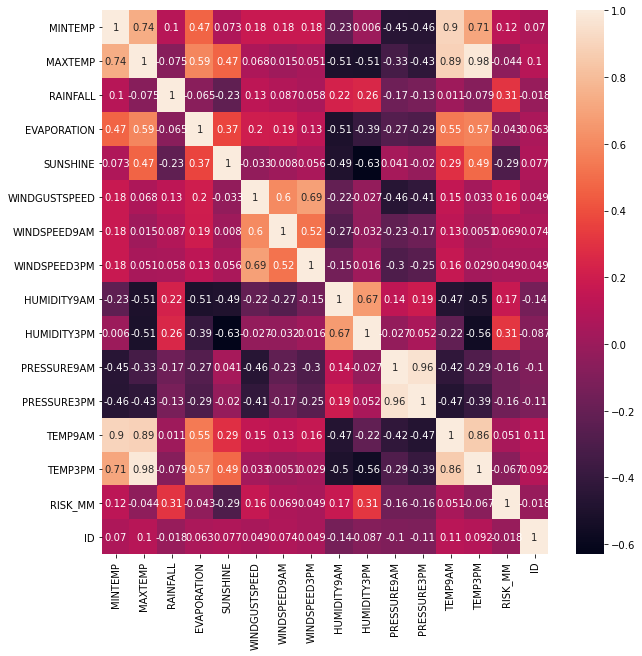

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
print(idadf.corr())
sns.heatmap(idadf.corr(), annot=True)

In [ ]:
#Push custom ML to ipshost alone

In [ ]:
code_str_host = """def decision_tree_ml_host(self, df):

    from sklearn.model_selection import cross_val_score
    from sklearn.impute import SimpleImputer
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import train_test_split

    from sklearn.preprocessing import LabelEncoder
    import numpy as np

    result = df.groupby('LOCATION')
   

    for name, group in result:
        # print(name)

        # print(group)
        def decision_tree_classifier(df):
            imputed_df = df.copy()
            ds_size = len(imputed_df)
            temp_dict = dict()





            columns = imputed_df.columns

            for column in columns:
                if column=='ID':
                    continue

                if (imputed_df[column].dtype == 'float64' or imputed_df[column].dtype == 'int64'):
                    if imputed_df[column].isnull().sum()==len(imputed_df):
                     imputed_df[column] = imputed_df[column].fillna(0)

                    else :
                     imp = SimpleImputer(missing_values=np.nan, strategy='mean')
                     transformed_column = imp.fit_transform(imputed_df[column].values.reshape(-1, 1))
                     imputed_df[column] = transformed_column


                if (imputed_df[column].dtype == 'object'):
                    # impute missing values for categorical variables
                    imp = SimpleImputer(missing_values=None, strategy='constant', fill_value='missing')
                    imputed_df[column] = imp.fit_transform(imputed_df[column].values.reshape(-1, 1))
                    imputed_df[column] = imputed_df[column].astype('str')
                    le = LabelEncoder()
                    # print(imputed_df[column].unique())

                    le.fit(imputed_df[column])
                    # print(le.classes_)
                    imputed_df[column] = le.transform(imputed_df[column])
                    temp_dict[column] = le

            X = imputed_df.drop(['RISK_MM', 'RAINTOMORROW'], axis=1)
            y = imputed_df['RAINTOMORROW']
            X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=42, stratify=y)
            #X_train_mod = X_train.drop(['RISK_MM'],axis=1)
            #X_test_mod = X_test.drop(['RISK_MM'],axis=1)
            dt = DecisionTreeClassifier(max_depth=5)
            dt.fit(X_train, y_train)

            accuracy = dt.score(X_test, y_test)    
            #print(accuracy)



            pred_df = X_test.copy()


            y_pred= dt.predict(X_test)

            pred_df['RAINTOMORROW'] = y_pred
            pred_df['DATASET_SIZE'] = ds_size
            pred_df['CLASSIFIER_ACCURACY']=round(accuracy,2)




            original_columns = pred_df.columns

            for column in original_columns:

             if column in temp_dict:   
               pred_df[column] = temp_dict[column].inverse_transform(pred_df[column])
               #print(pred_df)

            def print_output(x):
                row = [x['ID'], x['RAINTOMORROW'], x['DATASET_SIZE'], x['CLASSIFIER_ACCURACY']]
                self.output(row)


            pred_df.apply(print_output, axis=1)

            return pred_df


        ml_result = decision_tree_classifier(df=group)

        """





output_signature = {'ID':'int', 'RAINTOMORROW_PRED' :'str',  'DATASET_SIZE':'int', 'CLASSIFIER_ACCURACY':'float'}

import time
start = time.time()

nz_tapply = NZFunTApply(df=idadf, code_str=code_str_host, fun_name='decision_tree_ml_host', parallel=False,  output_signature=output_signature, merge_output_with_df=True)
result = nz_tapply.get_result()
result = result.as_dataframe()
print("\n")
print(result)
end = time.time()
print(end - start)

sns.catplot(x="LOCATION", hue="RAINTOMORROW_PRED", 

                data=result, kind="count", height=5, aspect =3, order=result.LOCATION.value_counts().iloc[:10].index);





              
plt.show()
               


In [ ]:
#Push custom ML to ipshost and spus

In [ ]:
code_str_host_spus="""def decision_tree_ml(self, df):
            from sklearn.model_selection import cross_val_score
            from sklearn.impute import SimpleImputer
            from sklearn.tree import DecisionTreeClassifier
            from sklearn.model_selection import train_test_split

            from sklearn.preprocessing import LabelEncoder
            import numpy as np

    

            # data preparation
            imputed_df = df.copy()
            ds_size = len(imputed_df)
            temp_dict = dict()
      

            columns = imputed_df.columns

            for column in columns:
                if column=='ID':
                    continue

                if (imputed_df[column].dtype == 'float64' or imputed_df[column].dtype == 'int64'):
                  if imputed_df[column].isnull().sum()==len(imputed_df):
                     imputed_df[column] = imputed_df[column].fillna(0)
                      
                  else :
           
                     imp = SimpleImputer(missing_values=np.nan, strategy='mean')
                     transformed_column = imp.fit_transform(imputed_df[column].values.reshape(-1, 1))         
                     imputed_df[column] = transformed_column
                   
                if (imputed_df[column].dtype == 'object'):
                    # impute missing values for categorical variables
                    imp = SimpleImputer(missing_values=None, strategy='constant', fill_value='missing')
                    imputed_df[column] = imp.fit_transform(imputed_df[column].values.reshape(-1, 1))
                    imputed_df[column] = imputed_df[column].astype('str')
                    le = LabelEncoder()
                  
                    le.fit(imputed_df[column])
                    # print(le.classes_)
                    imputed_df[column] = le.transform(imputed_df[column])
                    temp_dict[column] = le
            
            
            
            # Create a decision tree
            dt = DecisionTreeClassifier(max_depth=5)
            X = imputed_df.drop(['RISK_MM', 'RAINTOMORROW'], axis=1)
            y = imputed_df['RAINTOMORROW']
            X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=42, stratify=y)
           
           
            dt.fit(X_train, y_train)
  
            accuracy = dt.score(X_test, y_test)    
            #print(accuracy)
    
 
   
            pred_df = X_test.copy()
            
    
            y_pred= dt.predict(X_test)
    
            pred_df['RAINTOMORROW'] = y_pred
            pred_df['DATASET_SIZE'] = ds_size
            pred_df['CLASSIFIER_ACCURACY']=round(accuracy,2)
   
            
  

            original_columns = pred_df.columns
  
            for column in original_columns:
        
             if column in temp_dict:   
               pred_df[column] = temp_dict[column].inverse_transform(pred_df[column])
               #print(pred_df)
    
            def print_output(x):
                row = [x['ID'], x['RAINTOMORROW'], x['DATASET_SIZE'], x['CLASSIFIER_ACCURACY']]
                self.output(row)
            
                
            pred_df.apply(print_output, axis=1)
          
            

    

       
"""


output_signature = {'ID':'int', 'RAINTOMORROW_PRED' :'str',  'DATASET_SIZE':'int', 'CLASSIFIER_ACCURACY':'float'}
import time
start = time.time()

nz_groupapply = NZFunGroupedApply(df=idadf,  code_str=code_str_host_spus, index='LOCATION', fun_name="decision_tree_ml", output_signature=output_signature, merge_output_with_df=True)
#nz_groupapply = NZFunGroupedApply(df=idadf,  code_str=code_str_host_spus, index='LOCATION', fun_name="decision_tree_ml")
result = nz_groupapply.get_result()
result= result.as_dataframe()
print("Host+ SPUs execution - slicing on user selection -ML function for partitions within slices\n")
print(result)
end = time.time()
print(end - start)

sns.catplot(x="LOCATION", hue="RAINTOMORROW_PRED", 

                data=result, kind="count", height=5, aspect =3, order=result.LOCATION.value_counts().iloc[:10].index);

              
plt.show()



In [ ]:
#Push custom data transformation on host and spus - NZFunApply

In [ ]:
code_str_apply="""
def apply_fun(self, x):
    from math import sqrt
    max_temp = x[3]
    id = x[24]
    fahren_max_temp = (max_temp*1.8)+32
    row = [id, max_temp,  fahren_max_temp]
    self.output(row)"""
output_signature = {'ID':'int', 'MAX_TEMP' :'float', 'FAHREN_MAX_TEMP' : 'float'}
nz_apply = NZFunApply(df=idadf, code_str= code_str_apply, fun_name='apply_fun', output_signature=output_signature, merge_output_with_df=True)
result = nz_apply.get_result()
result= result.as_dataframe()
print(result)